In [47]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby

## Data Preparation

In [48]:
REPO_ROOT = '/home/liskasi/Projects/Speaker-recognition'
VCTK_DATASET = 'VCTK'
LS_DATASET = 'LibriSpeech'

In [49]:
ls_path = Path(REPO_ROOT, 'DSU_creation', LS_DATASET, 'final_data_' + LS_DATASET.lower(), 'train.csv')
ls_data = pd.read_csv(ls_path)

vctk_path = Path(REPO_ROOT, 'DSU_creation', VCTK_DATASET, 'final_data_' + VCTK_DATASET.lower(), 'train.csv')
vctk_data = pd.read_csv(vctk_path)

In [50]:
# Analyze your vocabulary size
all_words = ' '.join(ls_data['text']).split()
unique_words = len(set(all_words))
print(f"Total unique words: {unique_words}")

# See word frequency distribution
from collections import Counter
word_freq = Counter(all_words)
print("Most common words:", word_freq.most_common(10))

Total unique words: 12609
Most common words: [('THE', 7013), ('AND', 4277), ('OF', 3364), ('TO', 3181), ('A', 2811), ('IN', 1897), ('I', 1875), ('THAT', 1581), ('HE', 1527), ('WAS', 1520)]


In [51]:
# Analyze text lengths
text_lengths = ls_data['text'].str.split().str.len()
print(f"Average length: {text_lengths.mean()}")
print(f"95th percentile: {text_lengths.quantile(0.95)}")
print(f"Max length: {text_lengths.max()}")

Average length: 25.30893979322927
95th percentile: 48.0
Max length: 63


In [52]:
vctk_path_train = Path(REPO_ROOT, 'DSU_creation', VCTK_DATASET, 'final_data_' + VCTK_DATASET.lower(), 'train.csv')
vctk_path_test = Path(REPO_ROOT, 'DSU_creation', VCTK_DATASET, 'final_data_' + VCTK_DATASET.lower(), 'test.csv')
vctk_path_dev = Path(REPO_ROOT, 'DSU_creation', VCTK_DATASET, 'final_data_' + VCTK_DATASET.lower(), 'dev.csv')

vctk_data_train = pd.read_csv(vctk_path_train)
vctk_data_test = pd.read_csv(vctk_path_test)
vctk_data_dev = pd.read_csv(vctk_path_dev)

print(f"Train set: {len(vctk_data_train)} rows")
print(f"Dev set: {len(vctk_data_test)} rows")
print(f"Test set: {len(vctk_data_dev)} rows")

Train set: 10050 rows
Dev set: 571 rows
Test set: 558 rows


In [53]:
def add_dsu_deduplicated_column(df):
    """
    Create a new column with deduplicated DSU tokens.
    
    Args:
        df (DataFrame): Input DataFrame
    
    Returns:
        DataFrame: DataFrame with added 'DSU_deduplicated' column
    """
    df[f'DSU_deduplicated'] = df['DSU'].apply(
        lambda x: ' '.join([k for k, _ in groupby(x.split())])
    )
    return df


In [54]:
ls_data = add_dsu_deduplicated_column(ls_data)
vctk_data = add_dsu_deduplicated_column(vctk_data)

## LibriSpeech Data exploration

In [55]:
ls_count_perspeaker = ls_data.groupby('speaker_id').size().sort_values(ascending=False)
ls_speaker_list = [str(i) for i in ls_count_perspeaker.index]

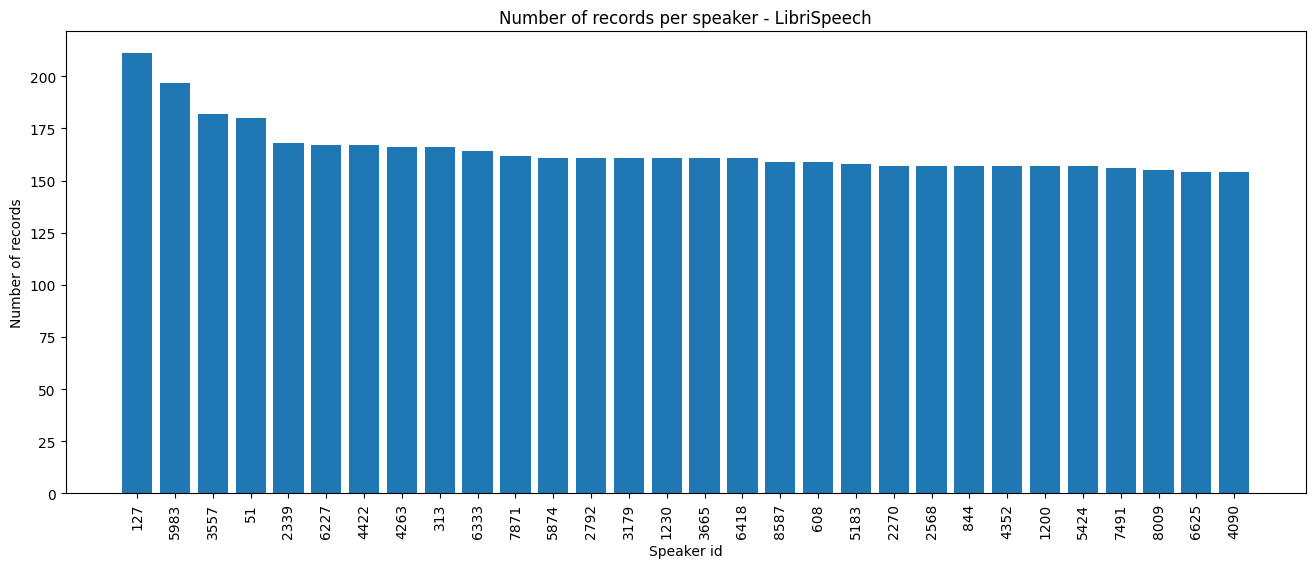

In [56]:
plt.figure(figsize=(16, 6))
plt.bar(x = ls_speaker_list, height = ls_count_perspeaker.values)
plt.title("Number of records per speaker - LibriSpeech")
plt.xlabel("Speaker id")
plt.ylabel("Number of records")
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [57]:
np.mean(ls_count_perspeaker.values)

164.43333333333334

In [58]:
ls_count_pertext = ls_data.groupby('text').size()
np.mean(ls_count_pertext.values)

1.0

In [59]:
ls_count_perspeaker = ls_data.groupby('speaker_id').size().sort_values(ascending=False)


In [60]:
ls_text_lengths = ls_data['text'].str.split().str.len()
ls_length_text_counts = ls_text_lengths.value_counts().sort_values(ascending=False)

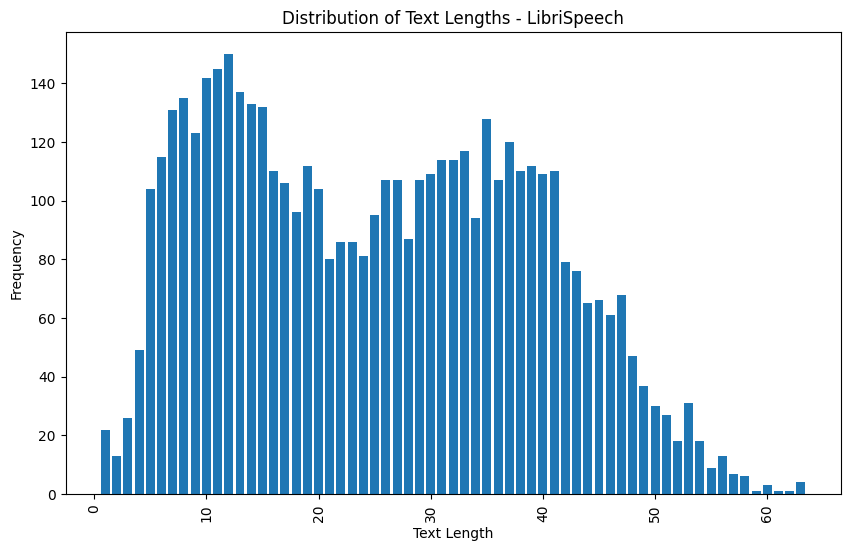

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(x=ls_length_text_counts.index, height=ls_length_text_counts.values)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths - LibriSpeech")
plt.xticks(rotation=90)
plt.show()

In [62]:
ls_dsu_lengths = ls_data['DSU'].str.split().str.len()
ls_length_dsu_counts = ls_dsu_lengths.value_counts().sort_values(ascending=False)

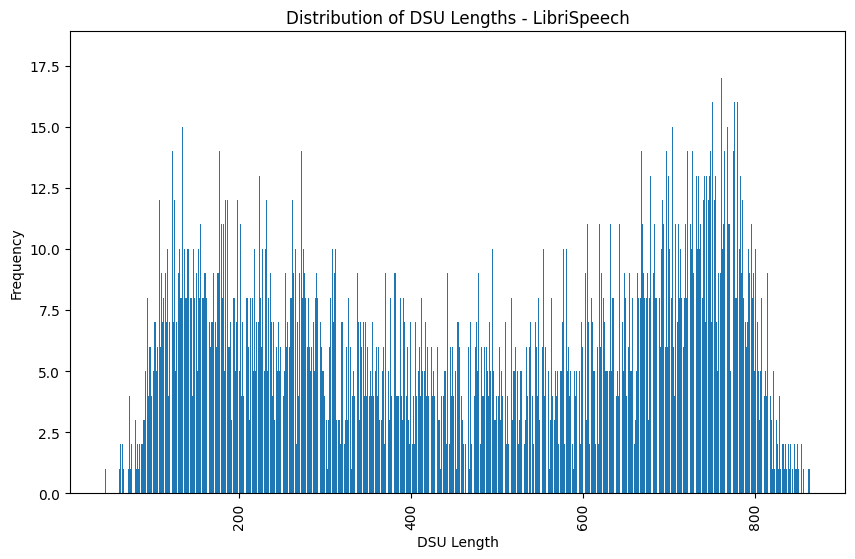

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(x=ls_length_dsu_counts.index, height=ls_length_dsu_counts.values)
plt.xlabel("DSU Length")
plt.ylabel("Frequency")
plt.title("Distribution of DSU Lengths - LibriSpeech")
plt.xticks(rotation=90)
plt.show()

In [64]:
np.mean(ls_dsu_lengths.values)

466.3148185688222

In [65]:
ls_dsu_deduplicated_lengths = ls_data['DSU_deduplicated'].str.split().str.len()
ls_length_dsu_deduplicated_counts = ls_dsu_deduplicated_lengths.value_counts().sort_values(ascending=False)

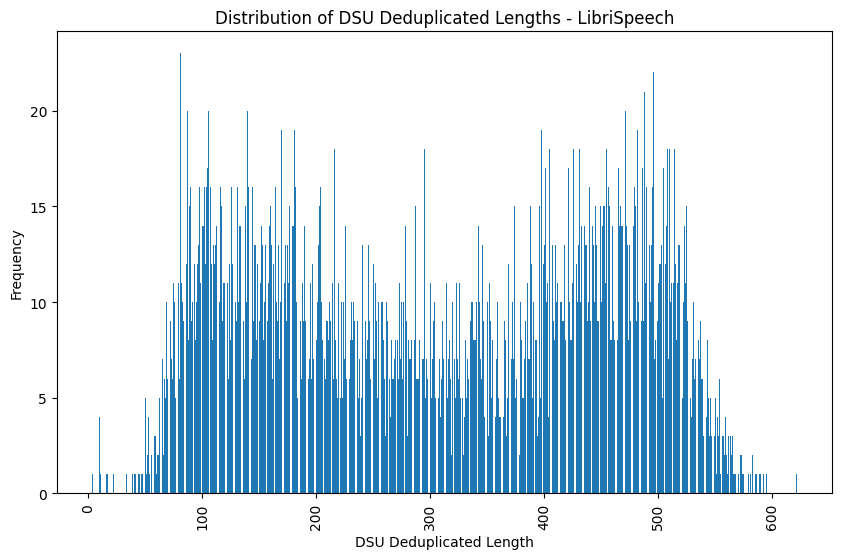

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(x=ls_length_dsu_deduplicated_counts.index, height=ls_length_dsu_deduplicated_counts.values)
plt.xlabel("DSU Deduplicated Length")
plt.ylabel("Frequency")
plt.title("Distribution of DSU Deduplicated Lengths - LibriSpeech")
plt.xticks(rotation=90)
plt.show()

In [67]:
np.mean(ls_dsu_deduplicated_lengths.values)

306.2892763024529

## VCTK Data exploration

In [68]:
vctk_count_perspeaker = vctk_data.groupby('speaker_id').size().sort_values(ascending=False)
vctk_speaker_list = [str(i) for i in vctk_count_perspeaker.index]

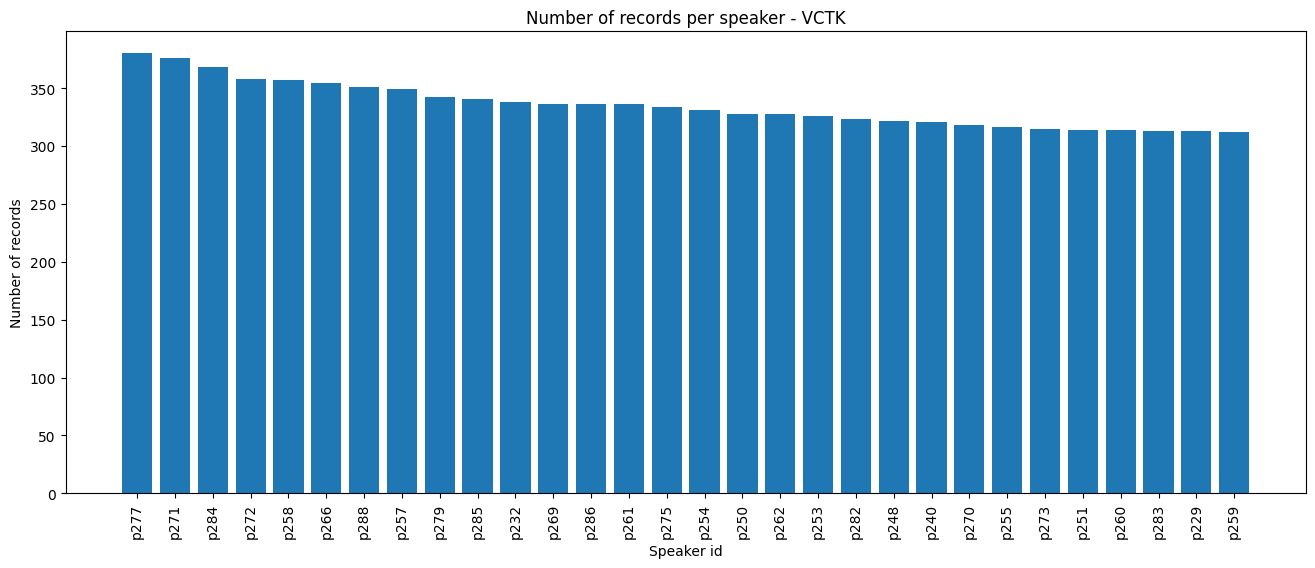

In [69]:
plt.figure(figsize=(16, 6))

plt.bar(x = vctk_speaker_list, height = vctk_count_perspeaker.values)
plt.title("Number of records per speaker - VCTK")
plt.xlabel("Speaker id")
plt.ylabel("Number of records")
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [70]:
np.mean(vctk_count_perspeaker.values)

335.0

In [71]:
vctk_count_pertext = vctk_data.groupby('text').size().sort_values(ascending=False)
np.mean(vctk_count_pertext.values)

4.293037163605297

Text(0, 0.5, 'Frequency')

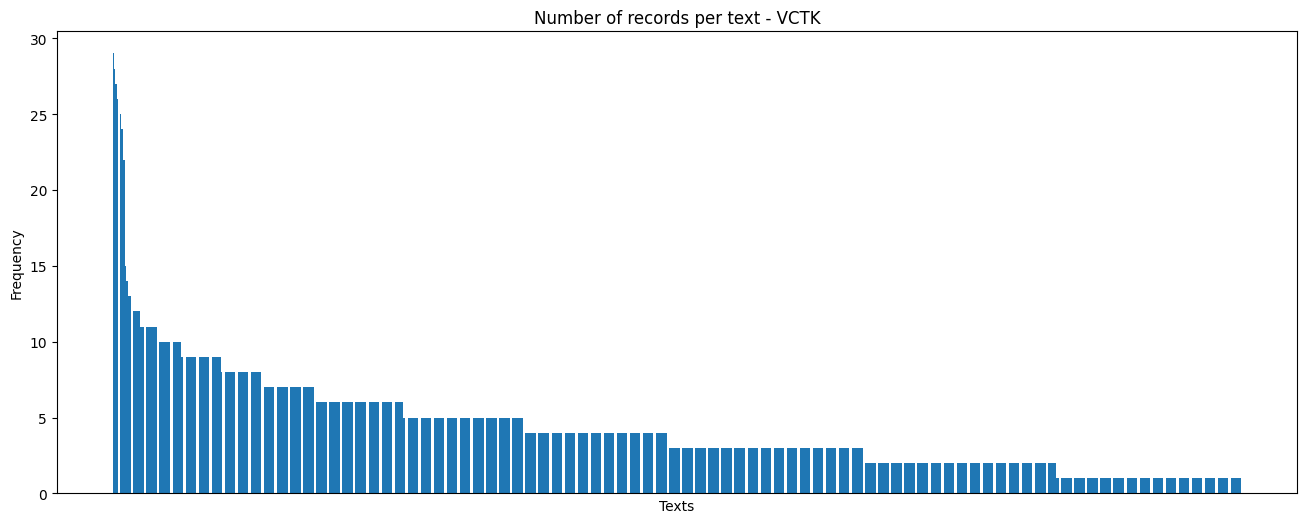

In [72]:
plt.figure(figsize=(16, 6))
count_pertext = vctk_data.groupby('text').size().sort_values(ascending=False)
text_list = [str(i) for i in count_pertext.index]
plt.bar(x = text_list, height = count_pertext.values)
plt.title("Number of records per text - VCTK")
plt.xticks([])
plt.xlabel("Texts")
plt.ylabel("Frequency")

In [73]:
np.mean(vctk_count_pertext.values)

4.293037163605297

In [74]:
vctk_text_lengths = ls_data['text'].str.split().str.len()
vctk_length_text_counts = vctk_text_lengths.value_counts().sort_values(ascending=False)

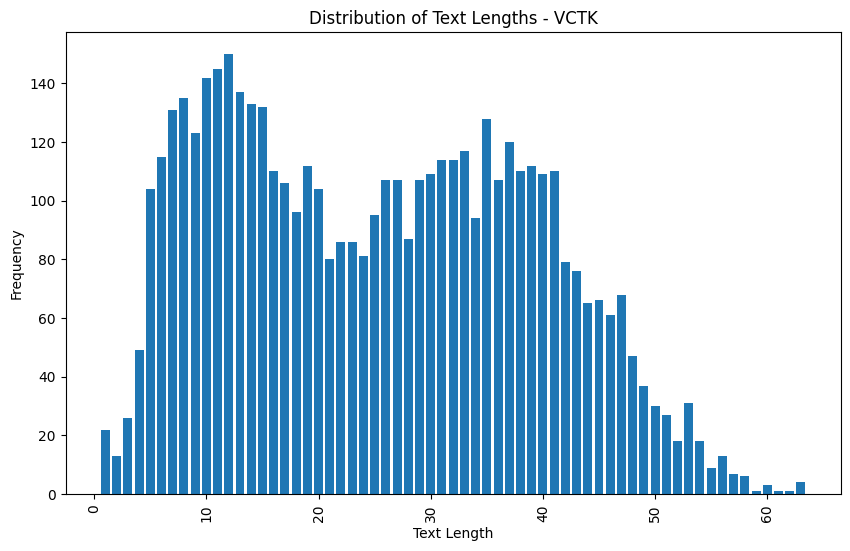

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(x=vctk_length_text_counts.index, height=vctk_length_text_counts.values)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths - VCTK")
plt.xticks(rotation=90)
plt.show()

In [76]:
vctk_dsu_lengths = vctk_data['DSU'].str.split().str.len()
vctk_length_dsu_counts = vctk_dsu_lengths.value_counts().sort_values(ascending=False)

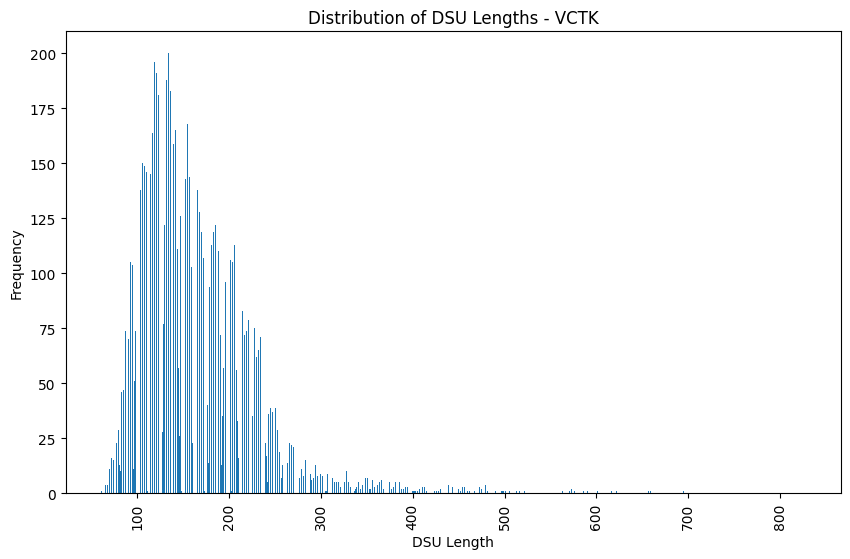

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(x=vctk_length_dsu_counts.index, height=vctk_length_dsu_counts.values)
plt.xlabel("DSU Length")
plt.ylabel("Frequency")
plt.title("Distribution of DSU Lengths - VCTK")
plt.xticks(rotation=90)
plt.show()

In [78]:
np.mean(vctk_dsu_lengths.values)

164.45074626865673

In [79]:
vctk_dsu_deduplicated_lengths = vctk_data['DSU_deduplicated'].str.split().str.len()
vctk_length_dsu_deduplicated_counts = vctk_dsu_deduplicated_lengths.value_counts().sort_values(ascending=False)

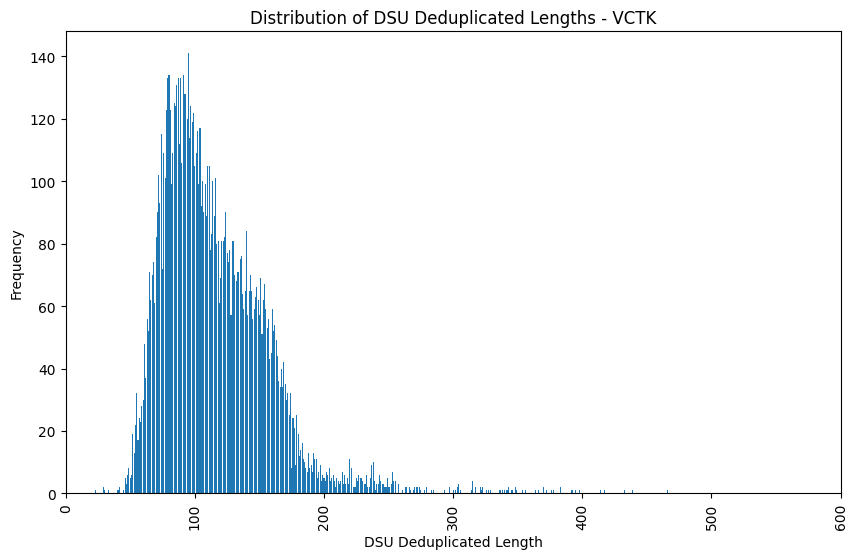

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(x=vctk_length_dsu_deduplicated_counts.index, height=vctk_length_dsu_deduplicated_counts.values)
plt.xlabel("DSU Deduplicated Length")
plt.ylabel("Frequency")
plt.title("Distribution of DSU Deduplicated Lengths - VCTK")
plt.xticks(rotation=90)
plt.xlim(0, 600)
plt.show()

In [81]:
np.mean(vctk_dsu_deduplicated_lengths.values)

114.98477611940298